# Плотностная кластеризация

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'C:\Users\asham\data\Cust_Segmentation.csv')

In [5]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [6]:
df=cust_df.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [8]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [9]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [10]:
df.dropna(inplace=True)

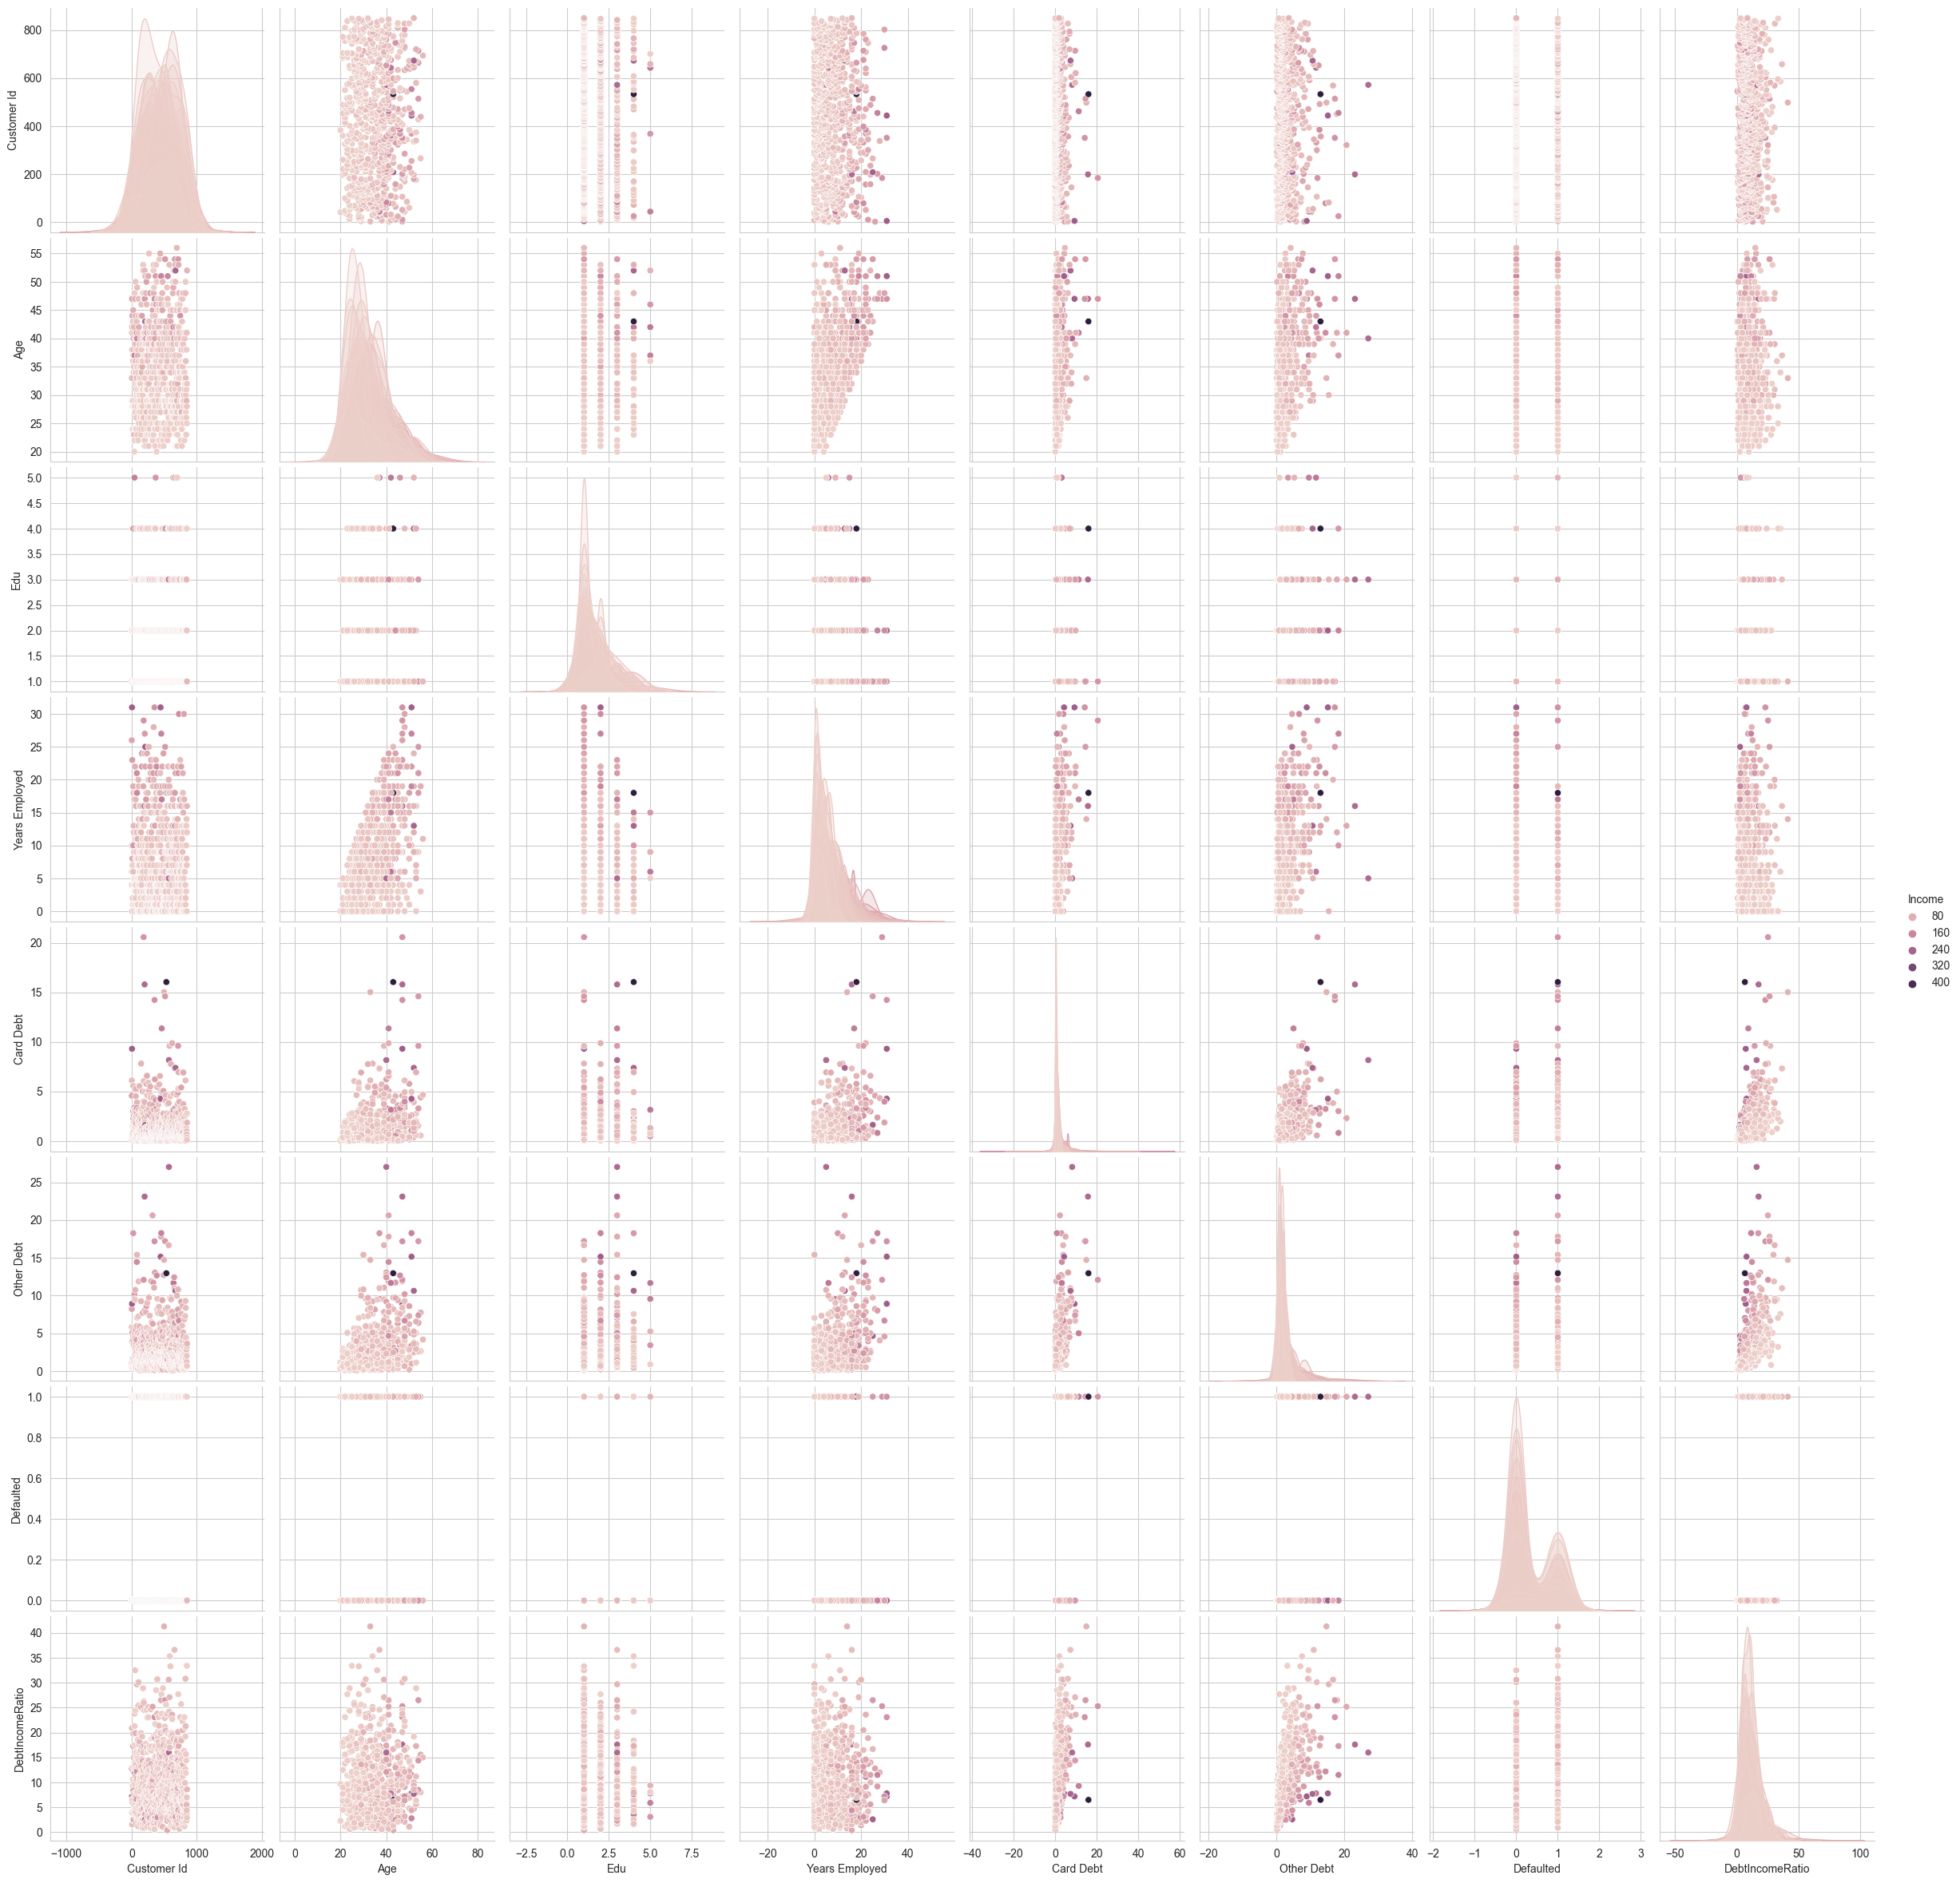

In [13]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Income",size=3);
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
clus_dataset=StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

<AxesSubplot: >

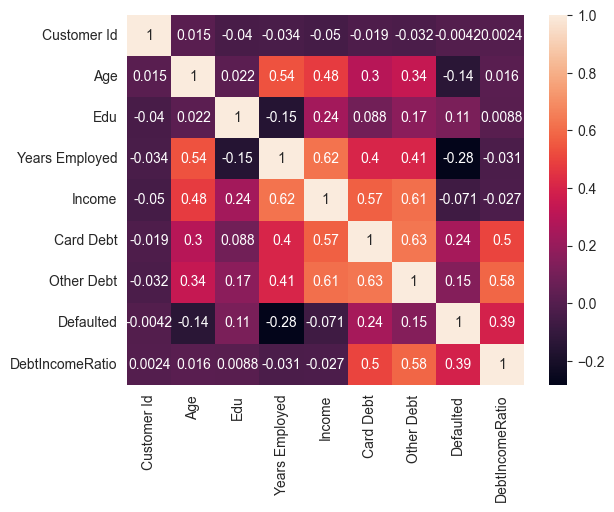

In [15]:
correl=df.corr()
sns.heatmap(correl,annot=True)

In [93]:
# поэксперементировать с eps и min_samples

dbscan = DBSCAN(eps= 9,
                min_samples= 9
               )

y_dbscan = dbscan.fit_predict(X)

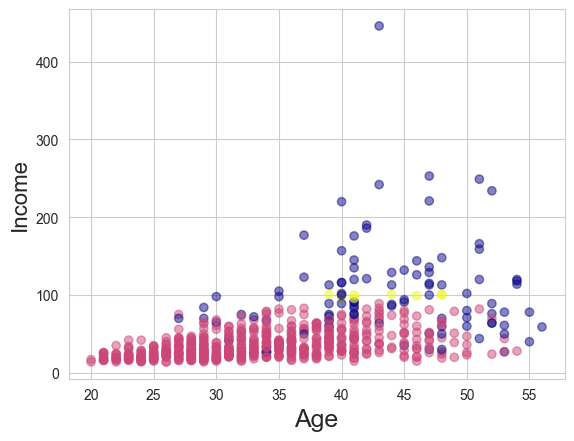

In [94]:
plt.scatter(X[:, 0] ,X[:,3], c = y_dbscan.astype(np.float), alpha = 0.5, cmap= "plasma") # plotting the clusters
plt.xlabel("Age",fontsize=18)
plt.ylabel("Income",fontsize=16)
plt.show()

In [99]:
df = pd.read_csv(r'C:\Users\asham\data\Cust_Segmentation.csv')

In [100]:
change = df.sample(50).index
change

Int64Index([ 55, 810, 141, 520,  15, 360, 158, 259, 205, 404, 827, 327, 424,
            109, 319, 252, 333, 740, 358, 300, 496, 653, 136, 492, 410, 535,
            499, 791, 320, 734, 171, 521, 330, 527,  32, 415,  36, 815,  76,
            154, 123, 800, 142, 822, 486, 826, 585, 209, 143, 693],
           dtype='int64')

In [102]:
df.loc[change,"Income"]=df.loc[change,"Income"]*5

In [103]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [104]:
df.dropna(inplace=True)

In [105]:
df = df.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


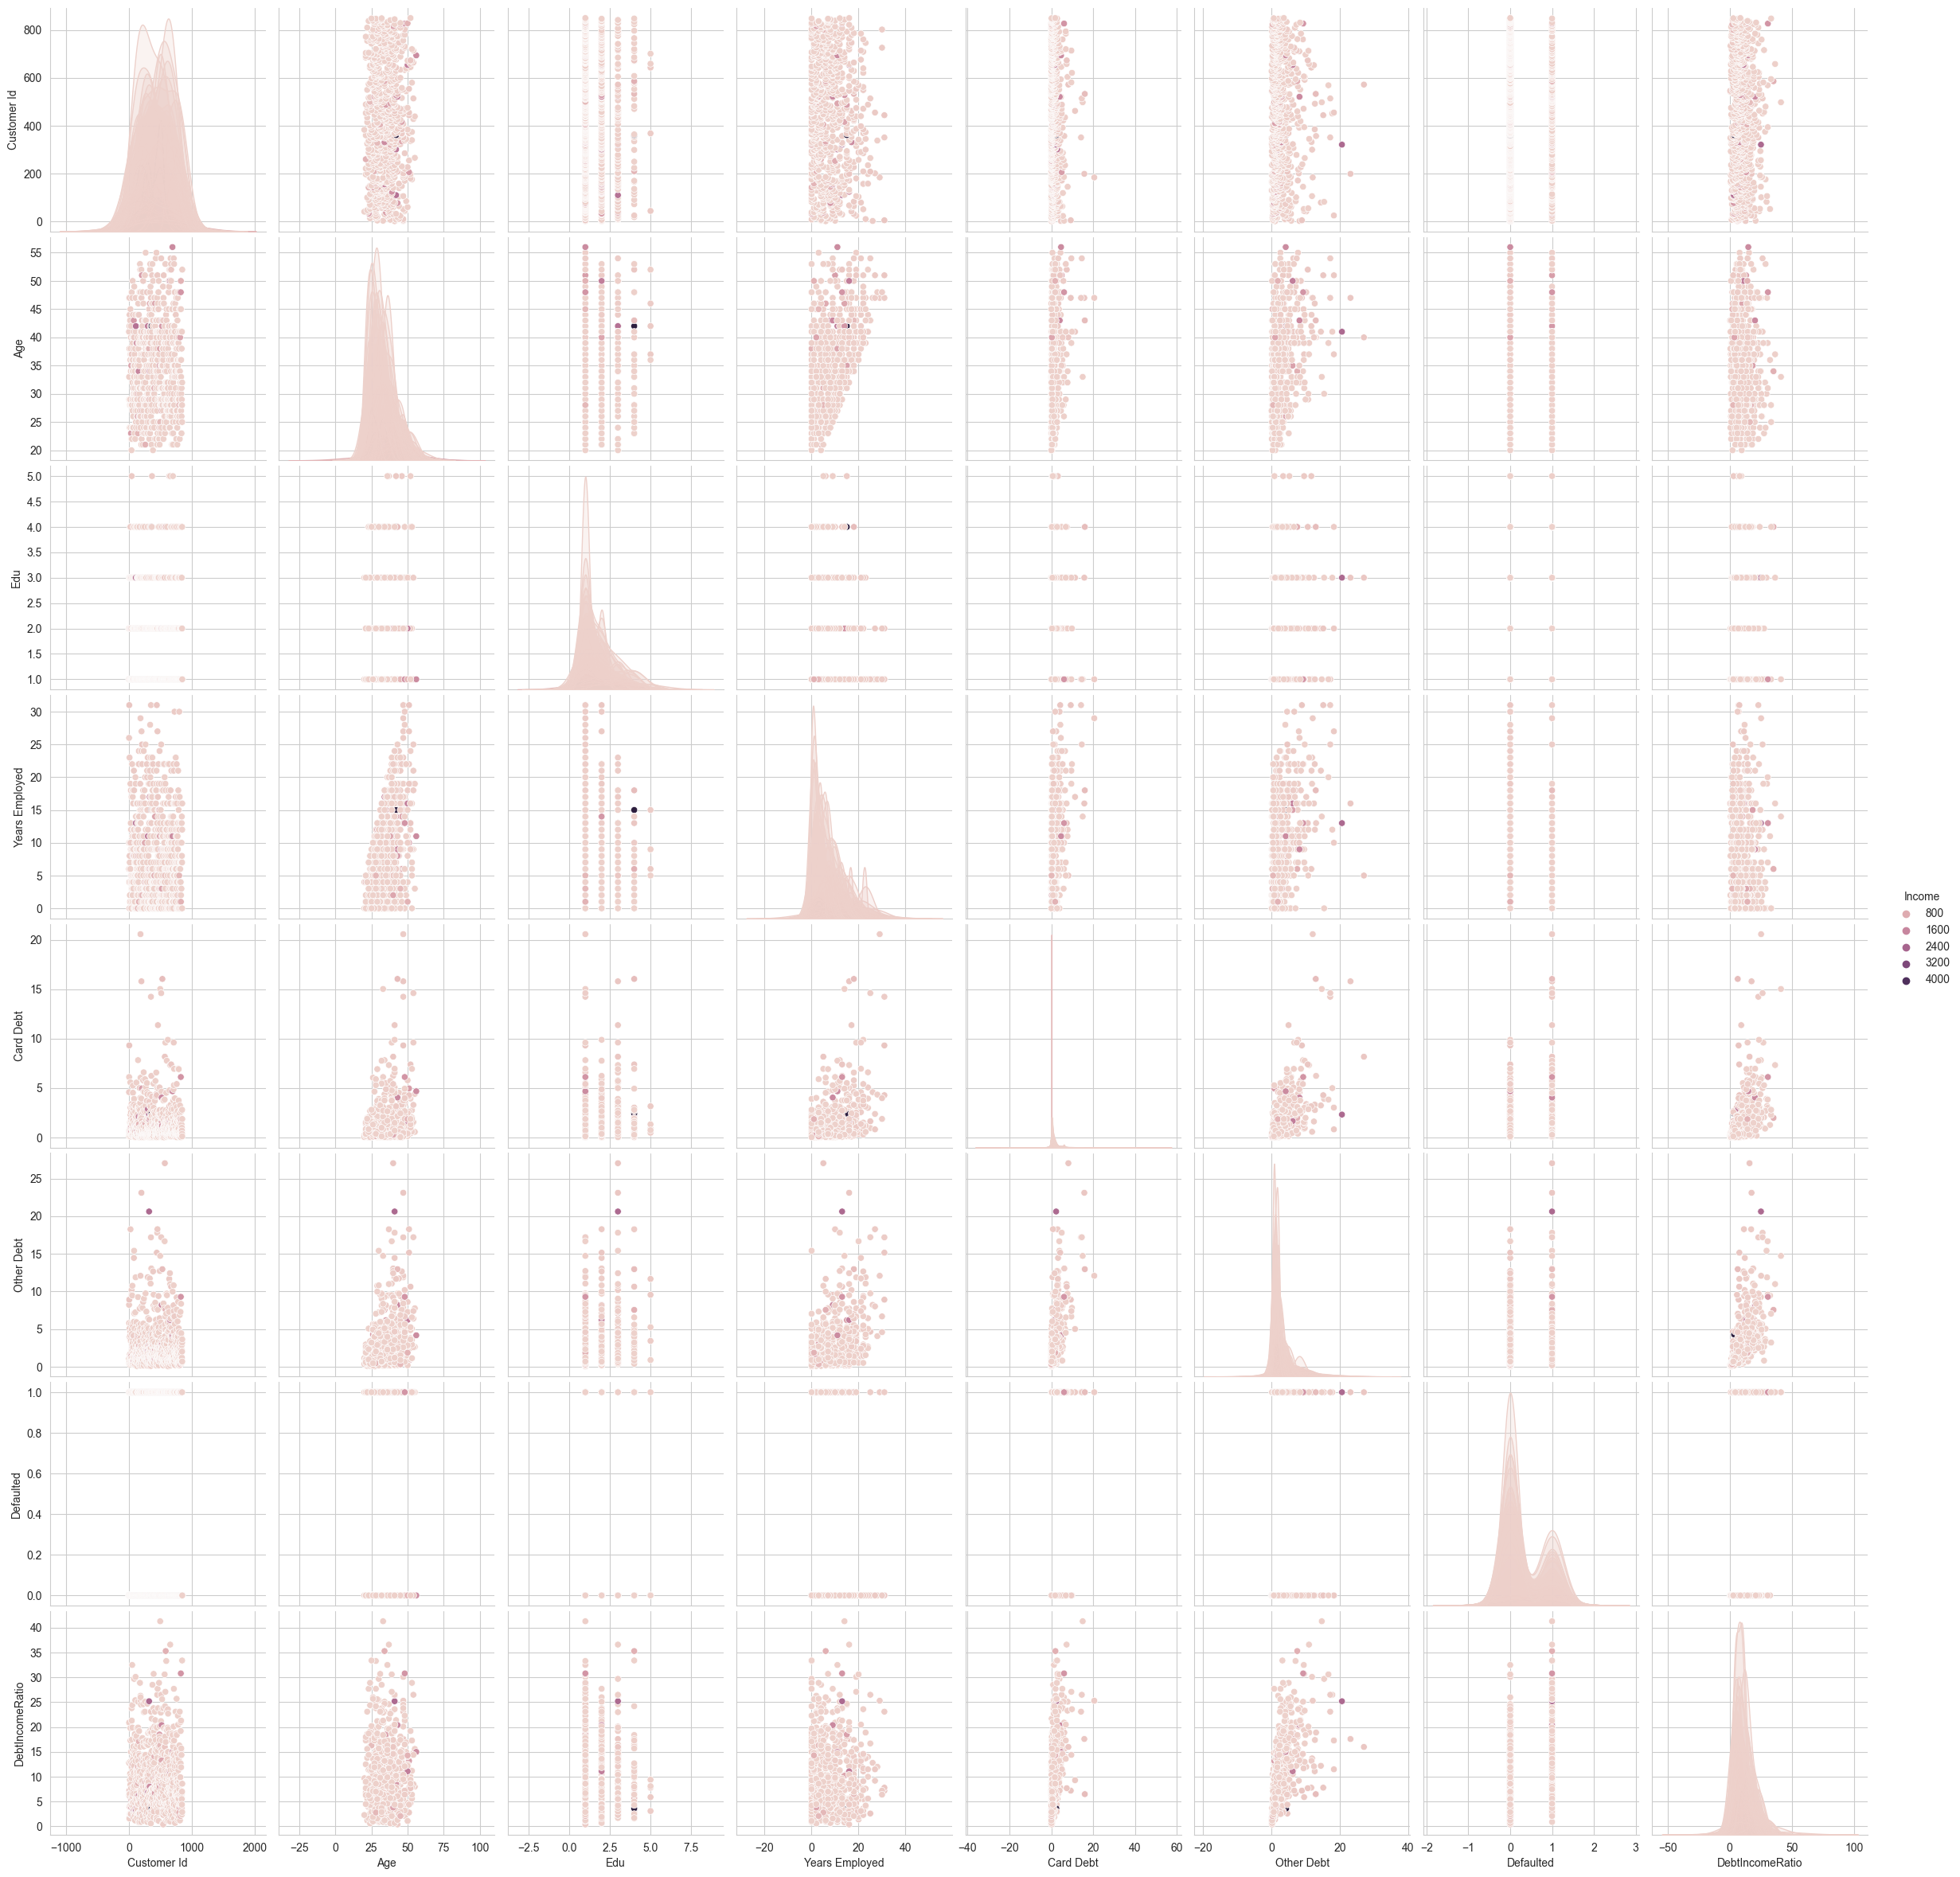

In [106]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Income",size=3);
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
clus_dataset=StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

In [122]:
dbscan = DBSCAN(eps= 9,
                min_samples= 9
               )

y_dbscan = dbscan.fit_predict(X)

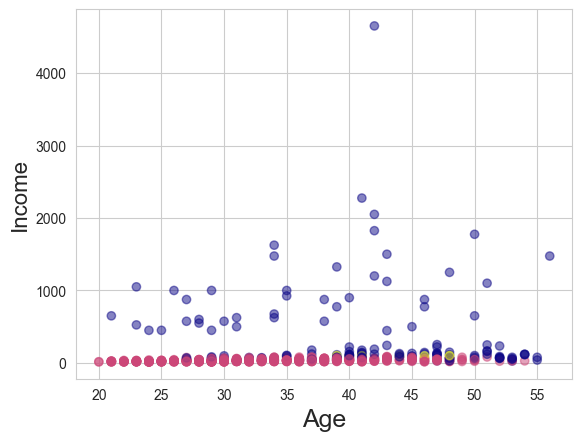

In [123]:
plt.scatter(X[:, 0] ,X[:,3], c = y_dbscan.astype(np.float), alpha = 0.5, cmap= "plasma") # plotting the clusters
plt.xlabel("Age",fontsize=18)
plt.ylabel("Income",fontsize=16)
plt.show()

K-Means - это алгоритм кластеризации, который разбивает набор данных на определенное число кластеров. В начале алгоритма случайным образом выбираются центры кластеров, затем алгоритм находит ближайшие точки к каждому центру и присваивает им метку кластера. Затем центры кластеров пересчитываются, чтобы они соответствовали средним значениям точек, которые уже принадлежат кластеру, и процесс повторяется до тех пор, пока кластеры не стабилизируются.

DBSCAN - это алгоритм кластеризации, который не требует задания числа кластеров заранее. Вместо этого алгоритм начинается с произвольной точки и ищет все точки, которые находятся на расстоянии меньше заданного значения (эпсилон) от нее. Затем для каждой такой группы точек алгоритм проверяет, достаточно ли их много, чтобы считать их кластером. Если да, то кластер образуется, и алгоритм продолжает поиск следующей группы точек, иначе точки рассматриваются как выбросы.

Основная разница между K-Means и DBSCAN заключается в том, что K-Means предназначен для данных, которые могут быть разделены на сферические кластеры фиксированного размера, в то время как DBSCAN может обнаруживать произвольно-формированные кластеры любого размера. Кроме того, DBSCAN может работать с шумом, так как он может отделять выбросы от кластеров, тогда как K-Means рассматривает все точки как принадлежащие к одному из кластеров, даже если они являются выбросами.